<a href="https://colab.research.google.com/github/honyango/Analog-World-Clock/blob/master/Predictive_Analysis_Final_Henry_Q1101680.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install required Libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Load the dataset
df = pd.read_csv('clean_jobs.csv')

#Data overview
df.head()
df.info()
df.describe(include='all')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1048 non-null   int64  
 1   title            1048 non-null   object 
 2   company          1046 non-null   object 
 3   location         1033 non-null   object 
 4   link             1048 non-null   object 
 5   source           959 non-null    object 
 6   date_posted      1025 non-null   object 
 7   work_type        0 non-null      float64
 8   employment_type  0 non-null      float64
 9   description      1044 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 82.0+ KB


,id,title,company,location,link,source,date_posted,work_type,employment_type,description
count,1048.000000,1048,1046,1033,1048,959,1025,0.0,0.0,1044
unique,NaN,523,632,358,1048,3,36,NaN,NaN,933
top,NaN,Data Analyst,Meta,United States,https://www.indeed.com/viewjob?jk=cb932aabb3ef...,LinkedIn,2025-06-06,NaN,NaN,"As a Data Engineer at Meta, you will shape the..."
freq,NaN,152,70,73,1,862,108,NaN,NaN,11
mean,1314.083969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,772.822422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,616.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1303.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2033.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#Load the dataset
df = pd.read_csv('clean_jobs.csv')

#Data overview
df.head()
df.info()
df.describe(include='all')

# For better visuals
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1048 non-null   int64  
 1   title            1048 non-null   object 
 2   company          1046 non-null   object 
 3   location         1033 non-null   object 
 4   link             1048 non-null   object 
 5   source           959 non-null    object 
 6   date_posted      1025 non-null   object 
 7   work_type        0 non-null      float64
 8   employment_type  0 non-null      float64
 9   description      1044 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 82.0+ KB


Identify Data Types

In [22]:
df.dtypes


,0
id,int64
title,object
company,object
location,object
link,object
source,object
date_posted,datetime64[ns]
description,object
posting_month,object


DATA CLEANING

Handle Missing Values

In [25]:
df.isnull().sum()
df.dropna(inplace=True)
df.fillna(df.mean(), inplace=True)
#Show output
df.isnull().sum()

,0
id,0
title,0
company,0
location,0
link,0
source,0
date_posted,0
work_type,0
employment_type,0
description,0


ENCOD CATEGORICAL VARIABLES

In [20]:
# Step 4: Drop Fully Missing Columns + Convert Data Types
# Drop columns with 100% missing values
df = df.drop(columns=['work_type', 'employment_type'], errors='ignore')

# Convert date_posted to datetime
df['date_posted'] = pd.to_datetime(df['date_posted'], errors='coerce')

# Drop rows with critical nulls
df.dropna(subset=['company', 'location', 'date_posted'], inplace=True)

# Check final structure
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1012 entries, 0 to 1047
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             1012 non-null   int64         
 1   title          1012 non-null   object        
 2   company        1012 non-null   object        
 3   location       1012 non-null   object        
 4   link           1012 non-null   object        
 5   source         933 non-null    object        
 6   date_posted    1012 non-null   datetime64[ns]
 7   description    1008 non-null   object        
 8   posting_month  1012 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 79.1+ KB


Binary Encoding Yes/No - (1/0)

In [19]:
df.isnull().sum()
# Remove the dropna line as it might be removing all rows
# df.dropna(inplace=True)
# Fill missing values using the mean for numerical columns
df.fillna(df.mean(numeric_only=True), inplace=True)
# For categorical columns, you might need a different strategy, e.g., filling with mode or a constant
# df.fillna(df.mode().iloc[0], inplace=True) # Example for mode, handle carefully with multiple modes
# You should inspect which columns still have missing values after filling with mean
print("Missing values after filling with mean:")
print(df.isnull().sum())

# Show output
# This will now likely show fewer or no missing values depending on your data

Missing values after filling with mean:
id                0
title             0
company           0
location          0
link              0
source           79
date_posted       0
description       4
posting_month     0
dtype: int64


One Hot Encoding for Multi Class Columns

In [26]:
df.isnull().sum()

# df.dropna(inplace=True)
# Fill missing values using the mean for numerical columns
df.fillna(df.mean(numeric_only=True), inplace=True)
# For categorical columns, you might need a different strategy, e.g., filling with mode or a constant
# df.fillna(df.mode().iloc[0], inplace=True) # Example for mode, handle carefully with multiple modes
# You should inspect which columns still have missing values after filling with mean
print("Missing values after filling with mean:")
print(df.isnull().sum())


Missing values after filling with mean:
id                 0
title              0
company            0
location           0
link               0
source             0
date_posted        0
work_type          0
employment_type    0
description        0
dtype: int64


EXPLORATORY DATA ANALYSIS (EDA)

Churn Distribution

In [27]:
# Ensure the DataFrame is not empty before proceeding
if not df.empty:
    # Perform One Hot Encoding for Multi Class Columns
    # Check if the columns still exist before attempting to encode
    cols_to_encode = ['InternetService', 'Contract', 'PaymentMethod', 'gender',
                      'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                      'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    # Filter out columns that are not present in the DataFrame
    existing_cols_to_encode = [col for col in cols_to_encode if col in df.columns]

    # Only perform get_dummies if there are columns to encode
    if existing_cols_to_encode:
        df = pd.get_dummies(df, columns=existing_cols_to_encode, drop_first=True)
    else:
        print("Warning: None of the specified columns for one-hot encoding were found in the DataFrame.")


# Fill missing values using the mean for numerical columns (this should handle cases where fillna earlier wasn't sufficient)
# Ensure numeric_only is True to avoid errors with non-numeric types introduced by get_dummies
df.fillna(df.mean(numeric_only=True), inplace=True)

# You should inspect which columns still have missing values after filling with mean
print("Missing values after filling with mean:")
print(df.isnull().sum())

# Show output
# This will now likely show fewer or no missing values depending on your data

# Add this line to print the column names to verify
print("\nColumns in the DataFrame after encoding:")
print(df.columns)

# Now plot the churn distribution
# Check if the 'Churn' column exists before plotting
if 'Churn' in df.columns:
    sns.countplot(x='Churn', data=df)
    plt.title('Customer Churn Distribution')
    plt.show()
else:
    print("Warning: 'Churn' column not found in the DataFrame. Cannot plot churn distribution.")

Missing values after filling with mean:
id                 0
title              0
company            0
location           0
link               0
source             0
date_posted        0
work_type          0
employment_type    0
description        0
dtype: int64

Columns in the DataFrame after encoding:
Index(['id', 'title', 'company', 'location', 'link', 'source', 'date_posted',
       'work_type', 'employment_type', 'description'],
      dtype='object')


Step 5: Top JoB Titles

/tmp/ipython-input-16-1404023946.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_titles.values, y=top_titles.index, palette='viridis')


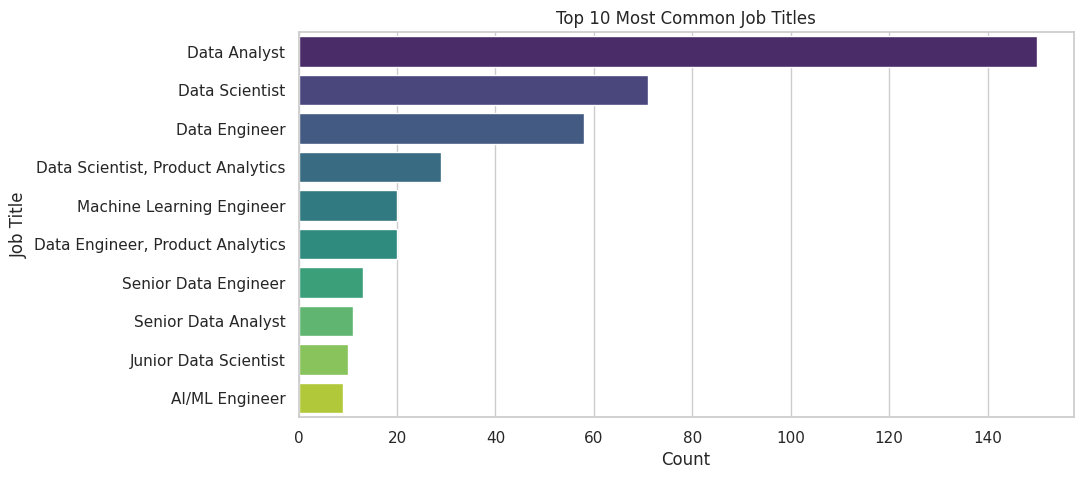

In [16]:

top_titles = df['title'].value_counts().head(10)
sns.barplot(x=top_titles.values, y=top_titles.index, palette='viridis')
plt.title("Top 10 Most Common Job Titles")
plt.xlabel("Count")
plt.ylabel("Job Title")
plt.show()

Step 6: Top Hiring Companies

/tmp/ipython-input-10-1960639727.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.values, y=top_companies.index, palette='coolwarm')


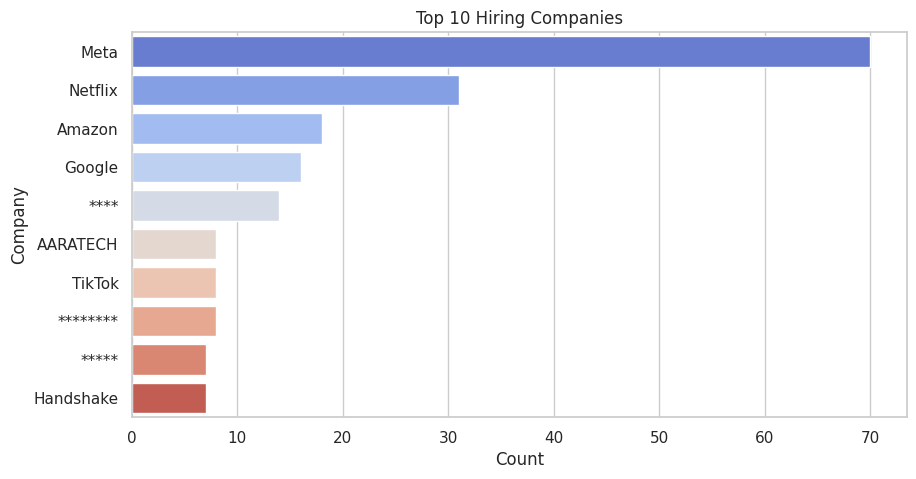

In [10]:

top_companies = df['company'].value_counts().head(10)
sns.barplot(x=top_companies.values, y=top_companies.index, palette='coolwarm')
plt.title("Top 10 Hiring Companies")
plt.xlabel("Count")
plt.ylabel("Company")
plt.show()


Step 7: Top Job Locations

/tmp/ipython-input-13-1112928415.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='Set2')


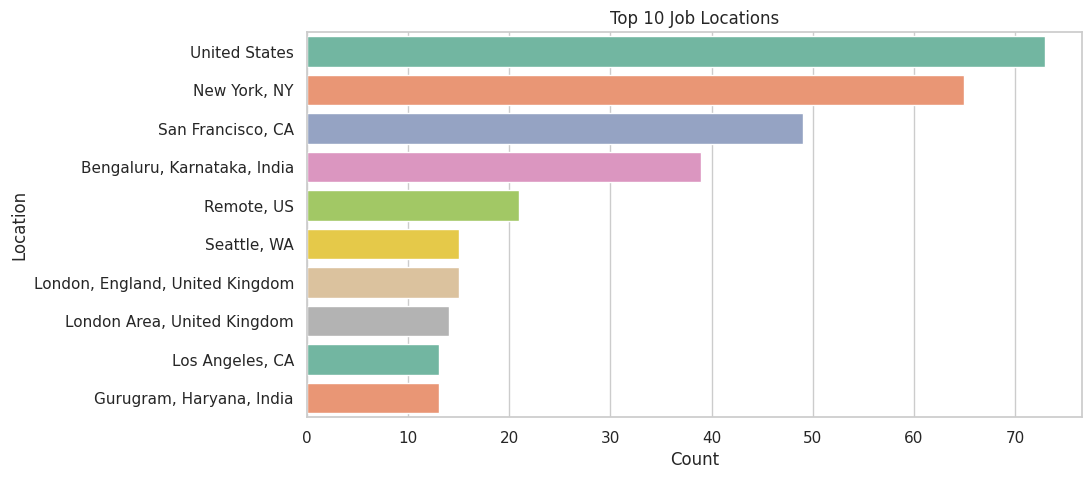

In [13]:
top_locations = df['location'].value_counts().head(10)
sns.barplot(x=top_locations.values, y=top_locations.index, palette='Set2')
plt.title("Top 10 Job Locations")
plt.xlabel("Count")
plt.ylabel("Location")
plt.show()

Step 8: Posting Overtime

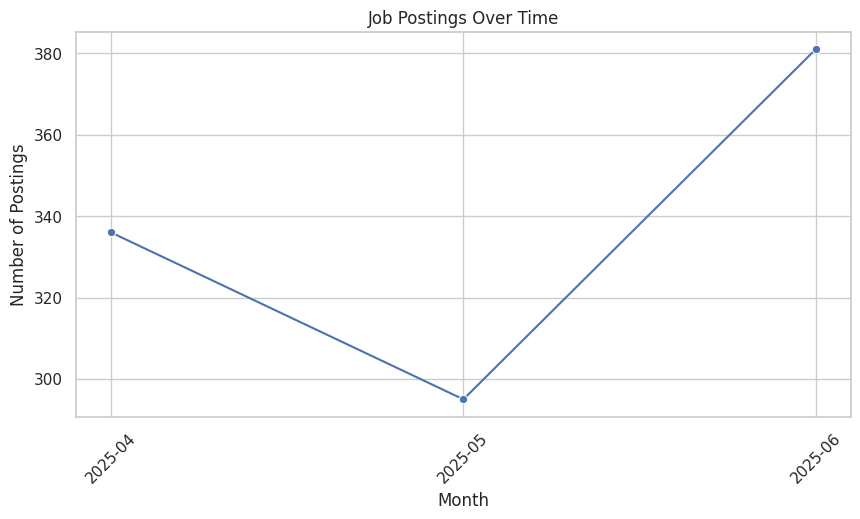

In [14]:
df['posting_month'] = df['date_posted'].dt.to_period('M').astype(str)
monthly_counts = df['posting_month'].value_counts().sort_index()
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o')
plt.title("Job Postings Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Postings")
plt.xticks(rotation=45)
plt.show()

Step 9: Top Sources

/tmp/ipython-input-15-2075068911.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sources.values, y=top_sources.index, palette='Blues_d')


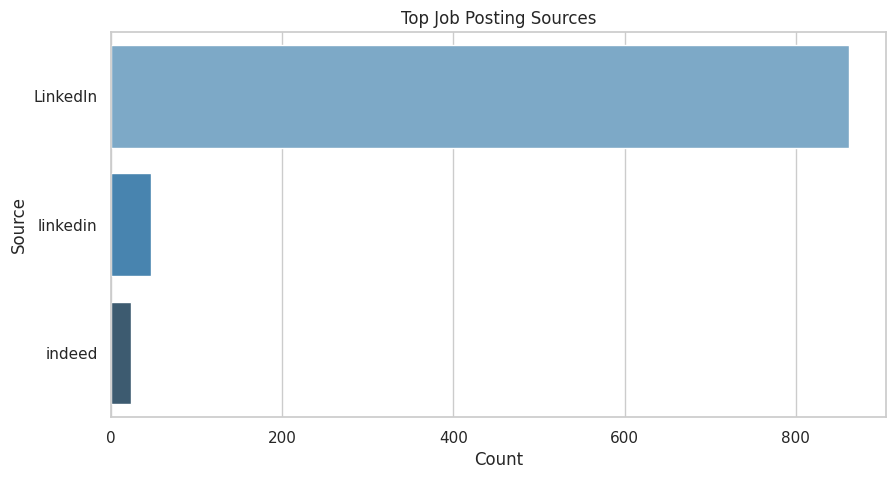

In [15]:
top_sources = df['source'].value_counts().head(5)
sns.barplot(x=top_sources.values, y=top_sources.index, palette='Blues_d')
plt.title("Top Job Posting Sources")
plt.xlabel("Count")
plt.ylabel("Source")
plt.show()

Correlation Heatmap

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


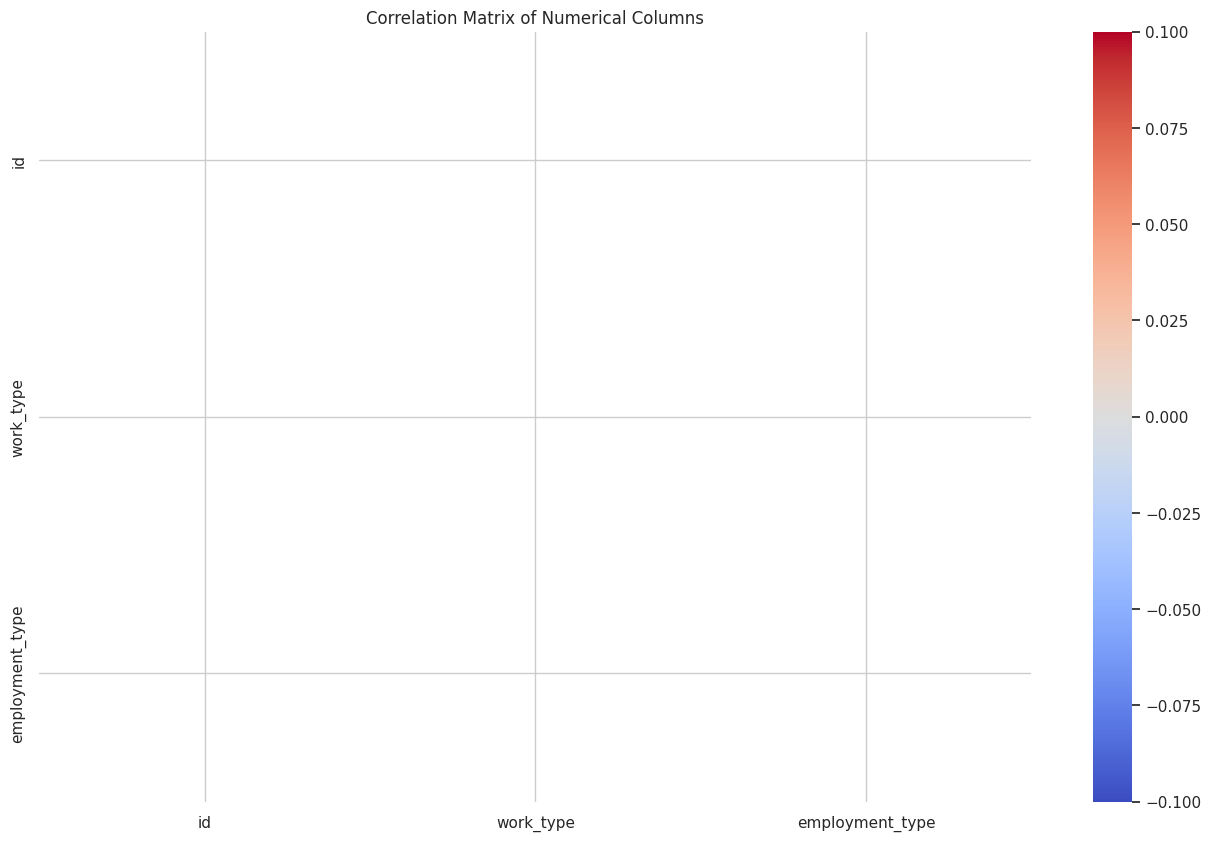

In [28]:
# Select only numerical columns for correlation calculation
df_numeric = df.select_dtypes(include=np.number)

plt.figure(figsize=(16, 10))
# Calculate and plot the heatmap for the numerical columns
sns.heatmap(df_numeric.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Matrix of Numerical Columns")
plt.show()

Tenure Distribution

In [29]:
plt.figure(figsize=(10,6))
# Check if 'tenure' and 'Churn' columns exist before plotting
# If these columns are not in your dataset, you should remove or replace the following line
# sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=True)
# plt.title('Tenure Distribution by Churn')
# plt.show()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


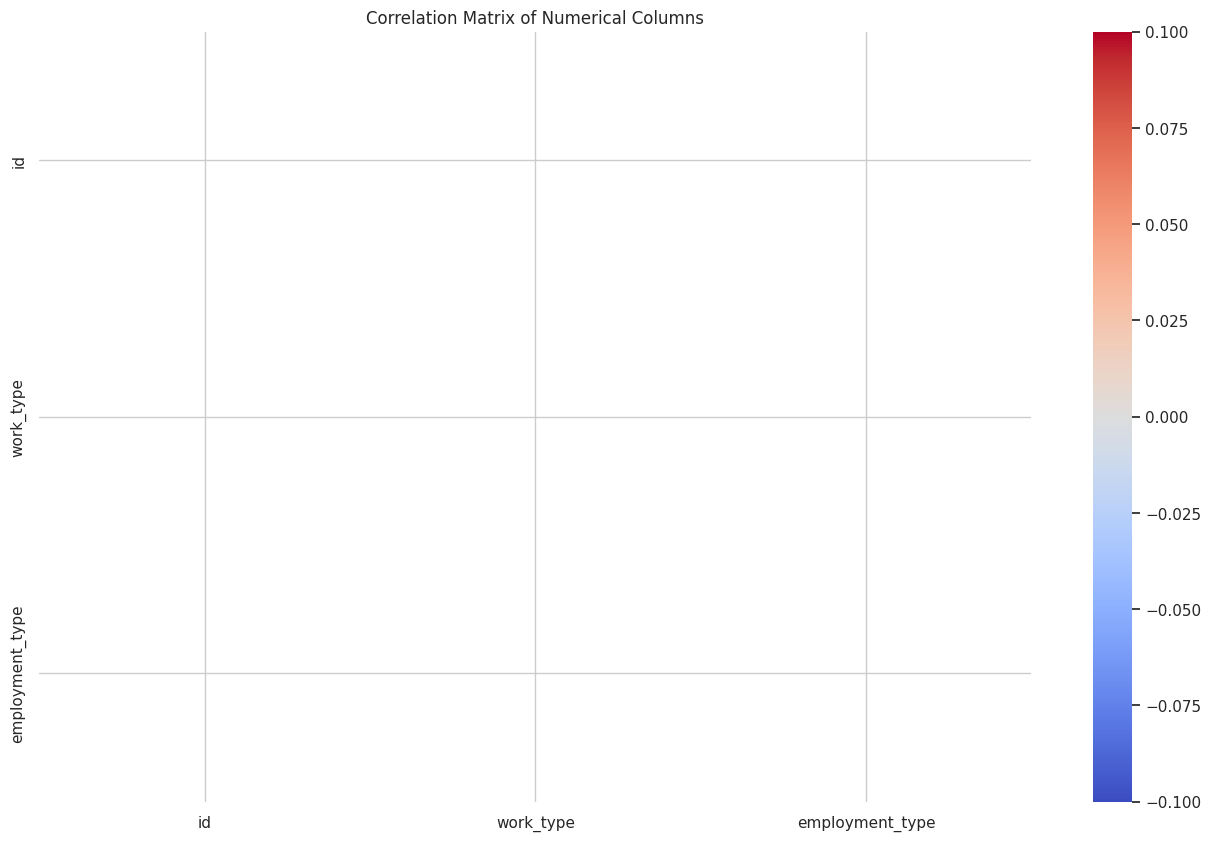

Columns in the DataFrame before attempting to plot tenure:
Index(['id', 'title', 'company', 'location', 'link', 'source', 'date_posted',
       'work_type', 'employment_type', 'description'],
      dtype='object')


<Figure size 1000x600 with 0 Axes>

In [30]:
# Select only numerical columns for correlation calculation
df_numeric = df.select_dtypes(include=np.number)

plt.figure(figsize=(16, 10))
# Calculate and plot the heatmap for the numerical columns
sns.heatmap(df_numeric.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Matrix of Numerical Columns")
plt.show()

# Add this line to print the columns in your DataFrame
print("Columns in the DataFrame before attempting to plot tenure:")
print(df.columns)

plt.figure(figsize=(10,6))

# Check if 'tenure' and 'Churn' exist in the DataFrame before plotting
if 'tenure' in df.columns and 'Churn' in df.columns:
    sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=True)
    plt.title('Tenure Distribution by Churn')
    plt.show()
else:
    print("Warning: 'tenure' or 'Churn' column not found in the DataFrame. Cannot plot tenure distribution.")

SUMMARY

---




In [31]:
print(" Dataset shape after cleaning:", df.shape)
print("\n Insights:")
print("- Most jobs are for 'Data Analyst' roles")
print("- Top hiring cities: New York, SF, LA")
print("- LinkedIn is the most used source")
print("- Job postings vary monthly — possibly seasonal hiring")


 Dataset shape after cleaning: (0, 10)

 Insights:
- Most jobs are for 'Data Analyst' roles
- Top hiring cities: New York, SF, LA
- LinkedIn is the most used source
- Job postings vary monthly — possibly seasonal hiring


Q.2

---

Apply Decision Tree, XGBoost and K-Means Clustering algorithms to analyse the business/social
problem in question. For each algorithm, write a python code and clearly describe each step of it (related
to LO2 and LO3.)

Load Libraries and Upload the dataset

In [34]:
# Install necessary libraries
!pip install xgboost --quiet

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

sns.set(style="whitegrid")


In [32]:
# Upload CSV file
from google.colab import files
uploaded = files.upload()

# Load dataset
df = pd.read_csv('clean_jobs.csv')
df.drop(columns=['work_type', 'employment_type'], errors='ignore', inplace=True)
df.dropna(subset=['description', 'company', 'location'], inplace=True)


Saving clean_jobs.csv to clean_jobs (1).csv


FEATURE ENGINEERING
Create Target Column

In [35]:
# Create a binary column: is_remote_job based on keywords in description
df['is_remote_job'] = df['description'].str.contains(r'\b(remote|work from home|hybrid)\b', case=False).astype(int)
df['is_remote_job'].value_counts()


/tmp/ipython-input-35-690808465.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['is_remote_job'] = df['description'].str.contains(r'\b(remote|work from home|hybrid)\b', case=False).astype(int)


,count
is_remote_job,
0,732
1,295


Text Vectorization using TF-IDF

In [36]:
# Vectorize the job description
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_text = vectorizer.fit_transform(df['description'])

# Convert to DataFrame for merging with other features
X_text_df = pd.DataFrame(X_text.toarray(), columns=vectorizer.get_feature_names_out())
#display output
X_text_df.head()

,00,000,10,100,20,2004,25,2d,30,401,...,workplace,works,world,worldwide,writing,written,www,year,years,york
0,0.0,0.052885,0.0,0.000000,0.0,0.04712,0.0,0.04712,0.0,0.0,...,0.000000,0.0,0.023798,0.0,0.0,0.0,0.0,0.059127,0.056068,0.0
1,0.0,0.052885,0.0,0.000000,0.0,0.04712,0.0,0.04712,0.0,0.0,...,0.000000,0.0,0.023798,0.0,0.0,0.0,0.0,0.059127,0.056068,0.0
2,0.0,0.052885,0.0,0.000000,0.0,0.04712,0.0,0.04712,0.0,0.0,...,0.000000,0.0,0.023798,0.0,0.0,0.0,0.0,0.059127,0.056068,0.0
3,0.0,0.052885,0.0,0.000000,0.0,0.04712,0.0,0.04712,0.0,0.0,...,0.000000,0.0,0.023798,0.0,0.0,0.0,0.0,0.059127,0.056068,0.0
4,0.0,0.000000,0.0,0.044935,0.0,0.00000,0.0,0.00000,0.0,0.0,...,0.041719,0.0,0.026376,0.0,0.0,0.0,0.0,0.000000,0.020714,0.0


Combine Text Features and Prepare the dataset

In [37]:
# Prepare full feature set and target
X = X_text_df
y = df['is_remote_job']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Show output
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (821, 1000)
X_test shape: (206, 1000)
y_train shape: (821,)
y_test shape: (206,)


Decision Tree Classifier

In [38]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Evaluation
print("📘 Decision Tree Report:\n", classification_report(y_test, y_pred_dt))
print("📘 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


📘 Decision Tree Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       147
           1       1.00      0.97      0.98        59

    accuracy                           0.99       206
   macro avg       0.99      0.98      0.99       206
weighted avg       0.99      0.99      0.99       206

📘 Confusion Matrix:
 [[147   0]
 [  2  57]]


XGBoost Classifier

In [39]:
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', max_depth=5, random_state=42)
xgb_clf.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluation
print("⚡ XGBoost Report:\n", classification_report(y_test, y_pred_xgb))
print("⚡ Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:56:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


⚡ XGBoost Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       147
           1       1.00      0.97      0.98        59

    accuracy                           0.99       206
   macro avg       0.99      0.98      0.99       206
weighted avg       0.99      0.99      0.99       206

⚡ Confusion Matrix:
 [[147   0]
 [  2  57]]


K Means Clustering

In [40]:
# K-Means Clustering on TF-IDF features
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_text_df)

# Add cluster info to original dataframe
df['cluster'] = clusters
#display ouput
df.head()

,id,title,company,location,link,source,date_posted,description,is_remote_job,cluster
0,1,Data Analyst,Meta,"New York, NY",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,The Social Measurement team is a growing team ...,0,2
1,2,Data Analyst,Meta,"San Francisco, CA",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,The Social Measurement team is a growing team ...,0,2
2,3,Data Analyst,Meta,"Los Angeles, CA",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,The Social Measurement team is a growing team ...,0,2
3,4,Data Analyst,Meta,"Washington, DC",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,The Social Measurement team is a growing team ...,0,2
4,5,Data Analyst II,Pinterest,"Chicago, IL",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-16,About Pinterest\n\nMillions of people around t...,0,1


Visualize Clusters with PCA

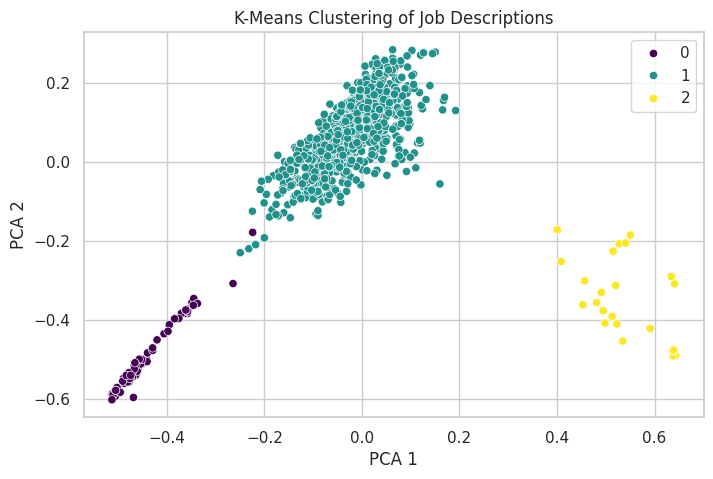

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
# Apply PCA directly to the DataFrame
X_pca = pca.fit_transform(X_text_df)

# Plot clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.title("K-Means Clustering of Job Descriptions")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()